In [8]:
from pymatgen import Structure
from matplotlib import pyplot as plt
from pymatgen import symmetry
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.operations import SymmOp
from pymatgen.analysis.diffraction import xrd
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator as adpc
import numpy as np
with MPRester("wxZbXC20FoNcfWQR") as m:
    structure = m.get_structure_by_material_id("mp-9365", False)    
    CifWriter(struct=structure, symprec=True).write_file("RbTbS2.cif")
    Cal=xrd.XRDCalculator()

In [9]:
    Patt=Cal.get_pattern(structure,two_theta_range=(0, 90))

In [10]:
    print("Pattern de diffraction:")
    print(Patt)

Pattern de diffraction:
DiffractionPattern
$2\Theta$: [11.6060338  23.33330903 25.50846961 26.4007004  29.72155215 32.00529153
 35.31496639 37.48839097 40.58865799 44.40757136 46.05764578 47.34234091
 47.71141844 50.75805219 50.95657482 51.90975747 52.40423929 54.35049452
 55.77949285 57.96975624 58.60975833 59.47881693 60.73486377 61.7200327
 62.64344506 66.92120864 67.21679682 69.86157372 70.65338974 71.06672823
 71.14221584 72.71016302 73.93309863 74.6956385  75.62591111 76.3939662
 77.15953723 78.27398223 79.15454463 79.98496039 81.77037696 82.95235198
 83.8935029  85.142124   86.4822977  86.63654513 87.84514399]
Intensity: [2.87463565e+01 2.38058822e+01 6.02772940e+00 4.54792293e+01
 1.00000000e+02 9.95886829e-01 4.34934189e-02 8.09699390e+00
 3.67558939e+01 3.36063280e+01 5.64884081e+00 1.41943958e+01
 6.25634714e+00 1.85832927e+01 4.14617686e+00 9.73034208e-01
 7.40485773e+00 1.74919815e+01 2.82641442e-01 1.33694939e-01
 2.37105153e-02 2.05238357e+00 8.24582535e-01 1.04801497e+0

Graphe correspondant:


<StemContainer object of 3 artists>

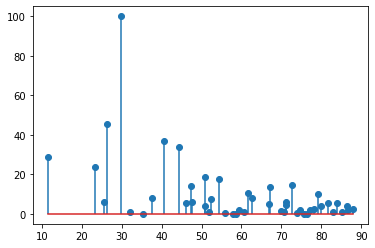

In [5]:
print("Graphe correspondant:")
plt.stem(Patt.x,Patt.y, use_line_collection=True)

In [14]:
sorty=np.sort(Patt.y)
k=np.size(Patt.x)
sortx=np.zeros(k)
hkls=Patt.hkls.copy()
for i in range(0,k):
    index=np.where(Patt.y == sorty[i])
    sortx[i]=Patt.x[index]
    hkls[i]=Patt.hkls[index[0][0]][0]
print("Les 3 premiers pics (par intensité) se trouvent à theta=")
pics=np.array([sortx[k-1],sortx[k-2],sortx[k-3]])
print(pics)
print("")
print("Et les indices hkl associés sont:")
picshkl=np.array([hkls[k-1],hkls[k-2],hkls[k-3]])
print(picshkl)
print("")
print("")
print("Par angles, les 3 premiers pics à apparaitre sont:")

pics2=np.array([Patt.x[0],Patt.x[1],Patt.x[3]])
print(pics2)
print("")
print("Et les indices hkl associés sont:")
picshkl2=np.array([Patt.hkls[0],Patt.hkls[1],Patt.hkls[3]])
print(picshkl2)

Les 3 premiers pics (par intensité) se trouvent à theta=
[29.72155215 26.4007004  40.58865799]

Et les indices hkl associés sont:
[{'hkl': (2, 1, 1), 'multiplicity': 6}
 {'hkl': (1, 1, 0), 'multiplicity': 6}
 {'hkl': (3, 3, 2), 'multiplicity': 6}]


Par angles, les 3 premiers pics à apparaitre sont:
[11.6060338  23.33330903 26.4007004 ]

Et les indices hkl associés sont:
[[{'hkl': (1, 1, 1), 'multiplicity': 2}]
 [{'hkl': (2, 2, 2), 'multiplicity': 2}]
 [{'hkl': (1, 1, 0), 'multiplicity': 6}]]
